<a href="https://colab.research.google.com/github/ngohuongly/fraud_detection/blob/main/FraudDetection_Final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents  
<ol>
     <li><b>Introduction</b>
        <ol>
            <li>Problem Statement</li>
            <li>Goals</li>
            <li>Objective</li>            
        </ol>
    </li>
    <li><b>Data</b>
        <ol>
            <li>Overview</li>
            <li>Loading the Data</li>
            <li>Studying the Data</li>
            <li>Preparing the Data for Modeling</li>
        </ol>
    </li>
    <li><b>Method</b>
        <ol>
            <li>Logistic Regresssion (Yusuf Sabuwala)</li>                
            <li>Random Forests (Sudhan Rameshwaran)</li>             
            <li>Decision Tree (Huong Ly Ngo)</li>
        </ol>
    </li>
    <li><b>Conclusion</b></li>
   
    
</ol>

<h1>1. Introduction</h1>

<h2>Problem Statment</h2>

<p>Fraud is one of the major issues we come up majorly in banks, life insurance, health insurance, and many others. These major frauds are dependent on the person who is trying to sell you the fake product or service, if you are matured enough to decide what is wrong then you will never get into any fraud transactions. But one such fraud that has been increasing a lot these days is fraud in making payments. In this project we will work on a solution to detect fraud using Data Mining models.</p>

<h2>Goals</h2>

<p>The goal to be achieved is to determine whether a given payment is fraud or not.</p>

<h2>Objective</h2>

<p>The objective is to analyze payment behavior based on several variables, determine what variables affect fraud criteria the most, then build a model that can classify if the payment is fraud or not.</p>

<h1>2. Data</h1>

<h2>Overview</h2>

<p>The dataset that we will be using is transaction data for online purchases collected from an e-commerce retailer. The dataset contains more than 39000 transactions, each transaction contains 5 features that will describe the nature of the transactions.</p>

<h2>Loading the Data</h2>


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving payment_fraud.csv to payment_fraud.csv


<h2>Importing Libraries</h2>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')


<h2>Studying the Data</h2>


In [ ]:
#checking the first 10 rows
df = pd.read_csv('payment_fraud.csv')
df.head(10)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
5,119,1,4.962055,paypal,0.000000,0
6,2000,1,4.921349,paypal,0.000000,0
7,371,1,4.876771,creditcard,0.000000,0
8,2000,1,4.748314,creditcard,0.000000,0
9,4,1,4.461622,creditcard,0.000000,0


In [ ]:
df.info()
## we see there are 6 attributes.
## there are 39221 items 
## Only payment method is categorical variable others are numeric variables
## the label attribute is called 'label'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [ ]:
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')

We see that this data consists of 39221 transactions and 6 columns. No missing values are detected.

- Age of the account by days: the values are integer.
- the number of items: The values are integer
- the local Time where the transaction was made: The values are float.
- the payment method : credit card, paypak, storecredit. 
For this data, we need to transform the payment method into number using hot encoder.
- Age of the payment methods per days: The values are float.
- label: fraud or not fraud, here 1 or 0.

In [ ]:
df.label.unique()

array([0, 1])

In [ ]:
#checking the numeric data in the dataset
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
0,29,1,4.745402,28.204861,0
1,725,1,4.742303,0.000000,0
2,845,1,4.921318,0.000000,0


In [ ]:
#checking the categorical data in the dataset
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,paymentMethod
0,paypal
1,storecredit
2,creditcard


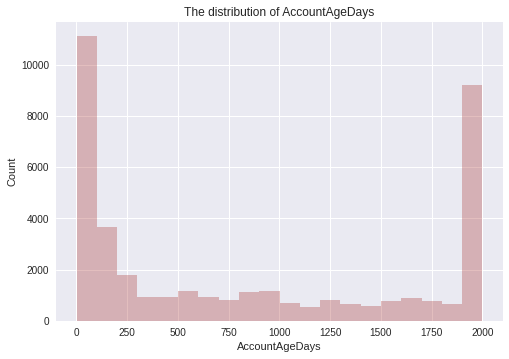

In [ ]:
# The distribution of accountAgeDays
plt.hist(df['accountAgeDays'], bins = 20, facecolor='brown', alpha=0.3)
plt.title("The distribution of AccountAgeDays")
plt.xlabel("AccountAgeDays")
plt.ylabel("Count")
plt.show()

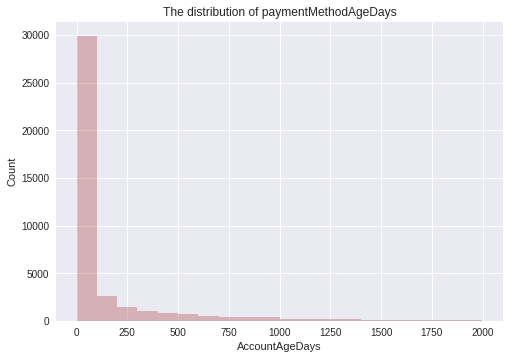

In [ ]:
# The distribution of paymentMethodAgeDays
plt.hist(df['paymentMethodAgeDays'], bins = 20, facecolor='brown', alpha=0.3)
plt.title("The distribution of paymentMethodAgeDays")
plt.xlabel("AccountAgeDays")
plt.ylabel("Count")
plt.show()

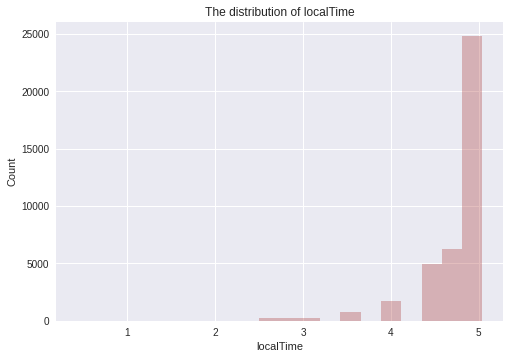

In [ ]:
# The distribution of localTime
plt.hist(df['localTime'], bins = 20, facecolor='brown', alpha=0.3)
plt.title("The distribution of localTime")
plt.xlabel("localTime")
plt.ylabel("Count")
plt.show()

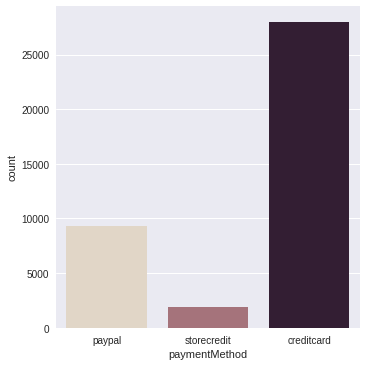

In [ ]:
#count the number of observations in each category 'paymentMethod'

sns.catplot(x="paymentMethod", kind = "count", palette = "ch:.25", data = df)

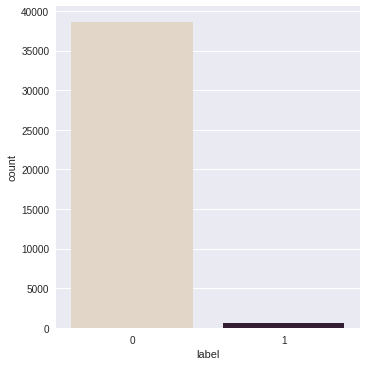

In [ ]:
#count the number of observations in each category 'label'

sns.catplot(x="label", kind = "count", palette = "ch:.25", data = df)

<h1>Correlation Analysis</h1>

                      accountAgeDays  numItems  localTime  \
accountAgeDays              1.000000 -0.037562  -0.012600   
numItems                   -0.037562  1.000000  -0.042563   
localTime                  -0.012600 -0.042563   1.000000   
paymentMethodAgeDays        0.330909  0.031683  -0.033076   
label                      -0.128098  0.038116  -0.059505   

                      paymentMethodAgeDays     label  
accountAgeDays                    0.330909 -0.128098  
numItems                          0.031683  0.038116  
localTime                        -0.033076 -0.059505  
paymentMethodAgeDays              1.000000 -0.052047  
label                            -0.052047  1.000000  


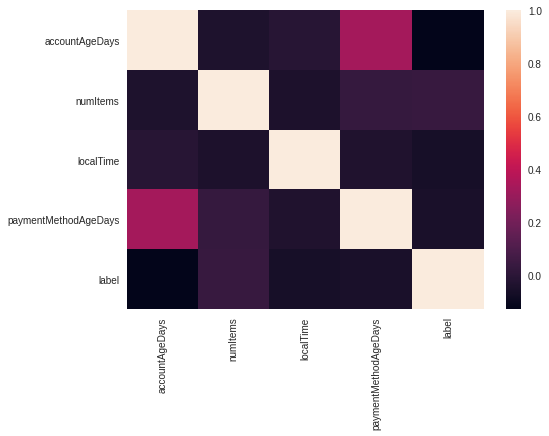

In [ ]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

<h2>Missing Values</h2>

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values


We can see there are no missing values in this dataset.

<h1>Preparing the data for modeling</h1>

In [ ]:
# converting categorical to numeric attribute for regression
df = pd.get_dummies(df, columns =['paymentMethod'])


In [ ]:
# Split dataset up into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'],
    test_size=0.3, random_state=17)

In [ ]:
X_train.shape

(27454, 7)

<h1>Logistic Regression</h1>

<p>This model is created by Yusuf Sabuwala</p>

In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)

[[11596     0]
 [    0   171]]


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11596
           1       1.00      1.00      1.00       171

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



In [ ]:
false_positive_rate_lr, true_positive_rate_lr, thresholds_lr = roc_curve(y_test,y_pred_lr)
roc_auc_lr = auc(false_positive_rate_lr, true_positive_rate_lr)
print("ROC Curves              =",roc_auc_lr)

precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
Precision_Recall_lrs = auc(recall_lr, precision_lr)
print("Precision-Recall Curves =",Precision_Recall_lrs)

ROC Curves              = 1.0
Precision-Recall Curves = 1.0


<h1>Random Forest</h1>

<p>This model is created by Sudhan Rameshwaran</p>

In [ ]:
#using scikit learn to fit the data using Random forest classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#executing the modedl on the Test Dataset
y_pred_rf = clf.predict(X_test)

In [ ]:
print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [ ]:
# Generating the confusion Matrix
print(confusion_matrix(y_test, y_pred_rf))

[[11596     0]
 [    0   171]]


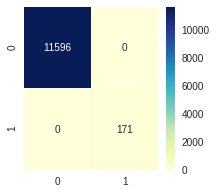

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

In [ ]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 1.00


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11596
           1       1.00      1.00      1.00       171

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



In [ ]:
false_positive_rate_rf, true_positive_rate_rf, thresholds_rf = roc_curve(y_test,y_pred_rf)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
print("ROC Curves              =",roc_auc_rf)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall_rf, precision_rf)
print("Precision-Recall Curves =",Precision_Recall_rfs)

ROC Curves              = 1.0
Precision-Recall Curves = 1.0


<h1>Decision Tree</h1>

<p>This model is created by Huong Ly Ngo</p>

In [ ]:
tree = DecisionTreeClassifier()
tree = clf.fit(X_train,y_train)

In [ ]:
y_pred_dt = tree.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_dt)
print(confusion_matrix)

[[11596     0]
 [    0   171]]


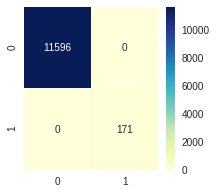

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(confusion_matrix, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

In [ ]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(tree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 1.00


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11596
           1       1.00      1.00      1.00       171

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
Precision_Recall_dts = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_dts)

ROC Curves              = 1.0
Precision-Recall Curves = 1.0


# Conclusion

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scores = {        
                 'Random Forest':  { 
                             'precision_score': precision_score(y_test, y_pred_rf),
                             'recall_score': recall_score(y_test, y_pred_rf)
                         },
          'Decision Tree':  { 
                             'precision_score': precision_score(y_test, y_pred_dt),
                             'recall_score': recall_score(y_test, y_pred_dt)
                         },
           'Logistic Regression':  { 
                             'precision_score': precision_score(y_test, y_pred_lr),
                             'recall_score': recall_score(y_test, y_pred_lr)
                         },
                 
            }

In [ ]:
from sklearn.metrics import precision_score


Precision_Recall = {
                 'Random Forest':  { 
                             'Precision_Recall': Precision_Recall_rfs
                         },
                    'Decision Tree':  { 
                             'Precision_Recall': Precision_Recall_dts
                         },
                    'Logistic Regression':  { 
                             'Precision_Recall': Precision_Recall_lrs
                         }
            }

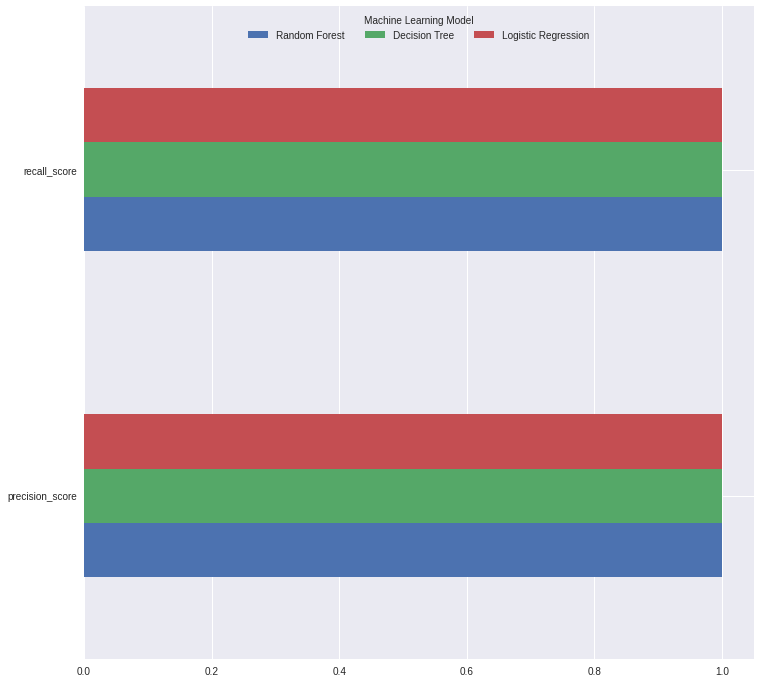

In [ ]:
scores = pd.DataFrame(scores)


scores.plot(kind="barh",figsize=(12, 12)).legend(loc='upper center', ncol=3, title="Machine Learning Model")